In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# reading dataset

df = pd.read_csv('/home/pedro/Desktop/autoprognosis/code_v5/INFLUD-21-09-2020.csv',sep=';',encoding = "ISO-8859-1")
df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]

print('confirmed data:',df.shape[0])


# Selecting people from North with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='RO')|(df['SG_UF_NOT']=='TO')|(df['SG_UF_NOT']=='AM')|(df['SG_UF_NOT']=='RR')\
#|(df['SG_UF_NOT']=='AC')|(df['SG_UF_NOT']=='PA')|(df['SG_UF_NOT']=='AP')]


# Selecting people from Northeast with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='RN')|(df['SG_UF_NOT']=='PE')|(df['SG_UF_NOT']=='SE')| (df['SG_UF_NOT']=='CE')\
#|(df['SG_UF_NOT']=='PB')| (df['SG_UF_NOT']=='BA')|(df['SG_UF_NOT']=='AL')| (df['SG_UF_NOT']=='PI')\
#|(df['SG_UF_NOT']=='MA')]


# Selecting people from Center-West with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='DF')|(df['SG_UF_NOT']=='MS')|(df['SG_UF_NOT']=='GO')| (df['SG_UF_NOT']=='MT')]


# Selecting people from Southest with COVID-19
#df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
#[(df['SG_UF_NOT']=='SP') | (df['SG_UF_NOT']=='RJ')|(df['SG_UF_NOT']=='ES')|(df['SG_UF_NOT']=='MG')]


# Selecting people from South with COVID-19
df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['CS_RACA']!=9.0][df['CS_RACA'].notna()]\
[(df['SG_UF_NOT']=='RS')|(df['SG_UF_NOT']=='SC')|(df['SG_UF_NOT']=='PR')]


#print('confirmed data in North :',df.shape[0])
#print('confirmed data in Northeast:',df.shape[0])
#print('confirmed data in Center-West:',df.shape[0])
#print('confirmed data in Southest:',df.shape[0])
#print('confirmed data in South:',df.shape[0])




/home/pedro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/pe

confirmed data: 242679


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [2]:
# comorbidities
df = df[['CS_RACA','EVOLUCAO','CARDIOPATI','HEMATOLOGI','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE',\
        'RENAL','OBESIDADE']]


# replacing values
df = df.fillna(0)
df.iloc[:,2:] = df.iloc[:,2:].replace([9,2], 0)

In [3]:
# adding comorbidities

df['sum_comorbidities'] = df.iloc[:,2:].sum(axis=1)


In [4]:
# Normalization

white = df['sum_comorbidities'][((df['CS_RACA'] == 1)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
black = df['sum_comorbidities'][((df['CS_RACA'] == 2)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
brown = df['sum_comorbidities'][((df['CS_RACA'] == 4)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
yellow = df['sum_comorbidities'][((df['CS_RACA'] == 3)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)


In [5]:
# Death and cured people

white_dea = df['sum_comorbidities'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
black_dea = df['sum_comorbidities'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
yellow_dea = df['sum_comorbidities'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
brown_dea = df['sum_comorbidities'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)


white_cur = df['sum_comorbidities'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
black_cur = df['sum_comorbidities'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
yellow_cur = df['sum_comorbidities'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
brown_cur = df['sum_comorbidities'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)


# 2  = death   1 = cure

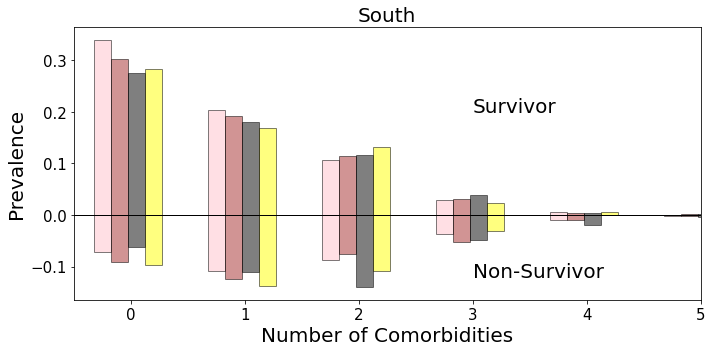

In [8]:
# Plotting the graphic

plt.figure(figsize=(10,5))

barWidth = 0.15

plt.bar(white_cur.index-0.25, white_cur/white.sum(), color='pink', alpha =0.5, width=barWidth, edgecolor='black')
plt.bar(brown_cur.index- 0.1, brown_cur/brown.sum(), color='brown', alpha =0.5, width=barWidth, edgecolor='black')
plt.bar(black_cur.index+ 0.05, black_cur/black.sum() , color='black', alpha =0.5, width=barWidth, edgecolor='black')
plt.bar(yellow_cur.index + 0.20, yellow_cur/yellow.sum() ,color='yellow', alpha =0.5, width=barWidth, edgecolor='black')


plt.bar(white_dea.index-0.25, -white_dea/white.sum(), color='pink', alpha =0.5, width=barWidth, edgecolor='black', label='Branca')
plt.bar(brown_dea.index - 0.1, -brown_dea/brown.sum(), color='brown', alpha =0.5, width=barWidth, edgecolor='black', label='Parda')
plt.bar(black_dea.index+ 0.05, -black_dea/black.sum() , color='black', alpha =0.5, width=barWidth, edgecolor='black', label='Preta')
plt.bar(yellow_dea.index + 0.20, -yellow_dea/yellow.sum() ,color='yellow', alpha =0.5, width=barWidth, edgecolor='black', label='Amarela')



plt.ylabel('Prevalence', fontsize=20)
plt.xlabel('Number of Comorbidities', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-0.5,5)

#plt.title('North', fontsize=20)


#plt.title('Northeast', fontsize=20)
#plt.ylim(-0.26,0.35)
#plt.text(3, 0.15, 'Survivor', fontsize=20)
#plt.text(3, -0.15, 'Non-Survivor', fontsize=20)


#plt.title('Midwestern', fontsize=20)
#plt.ylim(-0.25,0.4)
#plt.text(3, 0.3, 'Survivor', fontsize=20)
#plt.text(3, -0.20, 'Non-Survivor', fontsize=20)

#plt.title('Southwest', fontsize=20)
#plt.text(3, 0.2, 'Survivor', fontsize=20)
#plt.text(3, -0.15, 'Non-Survivor', fontsize=20)
#plt.ylim(-0.20,0.35)


plt.title('South', fontsize=20)
plt.text(3, 0.2, 'Survivor', fontsize=20)
plt.text(3, -0.12, 'Non-Survivor', fontsize=20)


plt.axhline(y=0,linewidth=1,color='k')
#plt.legend(fontsize=15)
plt.tight_layout()
#plt.savefig('north_comorbidities.pdf')
#plt.savefig('northeast_comorbidities.pdf')
#plt.savefig('midwestern_comorbidities.pdf')
#plt.savefig('southeast_comorbidities.pdf')
plt.savefig('south_comorbidities.pdf')


plt.show()